<a href="https://colab.research.google.com/github/Abminor/HomeworkHelp2/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 6



##Background
>
>
>
###In 2021, a paper was published in Nature, titled "A 10 percent increase in global land evapotranspiration (LE) from 2003 to 2019." However, this paper was later retracted due to an error in calculating the global mean evapotranspiration, specifically, the omission of area weights in their analysis. This error underscores the importance of meticulous data handling and verification in scientific research.
>
>
>
###Pascolini-Campbell, M., Reager, J.T., Chandanpurkar, H.A. et al. RETRACTED ARTICLE: A 10 percent increase in global land evapotranspiration from 2003 to 2019. Nature 593, 543–547 (2021). https://doi.org/10.1038/s41586-021-03503-5Links to an external site.
>
##Assignment Overview
>
>
###In this homework, you will focus on analyzing and visualizing global air temperature data. The objectives are to understand the differences between area-weighted and unweighted global air temperature analyses and to learn how to visualize these differences effectively.
>
###Tasks

###1. Go to  https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.07/cruts.2304141047.v4.07/tmp/Links to an external site.
>
###Download cru_ts4.07.2011.2020.tmp.dat.nc.gzLinks to an external site. and cru_ts4.07.2001.2010.tmp.dat.nc.gzLinks to an external site.
>
###Read the two data file and combine them into a single dataset (see https://docs.xarray.dev/en/stable/user-guide/combining.htmlLinks to an external site. ) (2 pts)
>
>
###Area-Weighted vs. Unweighted Global Annual Air Temperature Visualization (4 pts)
>
###Visualize the time series of global annual air temperature, both area-weighted and not weighted. Use different colors and/or line styles to clearly distinguish between the two datasets. The x-axis should represent the years, and the y-axis should represent the air temperature.
>
>
###     - Plot both time series on the same chart.

###    - Add trend lines for each series with fitted linear regression functions of the form T = a *year + b. Include the equations of these trend lines on the chart.
>
>
>
###4. Visualization of Unweighted Annual and Seasonal Mean Global Air Temperature (4 pts)
>
###Visualize the unweighted annual and seasonal (Winter: DJF, Spring: MAM, Summer: JJA, Fall: SON) mean global air temperature. Use the Robinson projection for these maps. Include all visualizations in the same figure but in different panels, with a colorbar for reference.

###      - Create a figure with multiple panels (at least five), one for each season and one for the annual mean.

###     - Use the Robinson projection for each map.

###     - Ensure each panel has a colorbar to indicate temperature values.

In [ ]:
#Reading the file data

#import the requests library to allow colab to retrieve files from urls
import urllib.request
import requests

#import other libraries
import os
import xarray as xr

#take the data from the crudata website
data1 = "https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.07/cruts.2304141047.v4.07/tmp/cru_ts4.07.2011.2020.tmp.dat.nc.gz"
data2 = "https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.07/cruts.2304141047.v4.07/tmp/cru_ts4.07.2001.2010.tmp.dat.nc.gz"

#define the file names
data2020 = "cru_ts4.07.2011.2020.tmp.dat.nc.gz"
data2010 = "cru_ts4.07.2001.2010.tmp.dat.nc.gz"

response1 = requests.get(data1)
response2 = requests.get(data2)

#save the downloaded files
with open(data2020, "wb") as f1, open(data2010, "wb") as f2:
    f1.write(response1.content)
    f2.write(response2.content)

#unzip the files
os.system("gzip -d cru_ts4.07.2011.2020.tmp.dat.nc.gz")
os.system("gzip -d cru_ts4.07.2001.2010.tmp.dat.nc.gz")

#read the files data
data1 = xr.open_dataset("cru_ts4.07.2011.2020.tmp.dat.nc")
data2 = xr.open_dataset("cru_ts4.07.2001.2010.tmp.dat.nc")

#combining the data
combined_data = xr.concat([data1, data2], dim="time")


In [ ]:
#explore the data
combined_data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 240)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 2011-01-16 2011-02-15 ... 2010-12-16
Data variables:
    tmp      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    stn      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:tmp.2304141039.dtb
    history:      Fri 14 Apr 11:30:51 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [ ]:
#Area-Weighted vs. Unweighted Global Annual Air Temperature Visualization

#import libraries
import matplotlib.pyplot as plt
import numpy as np

#extract air temperature
ta = combined_data["tmp"]
ta

#calculate the unweighted mean of air temp
uw_mean = ta.mean(("lon", "lat"))
uw_mean

#calculate the area for each grid based on the latitude
weights = np.cos(np.deg2rad(ta.lat))
weights.name = "weights"
weights

#calculate the weighted mean
ta_weighted = ta.weighted(weights)
w_mean = ta_weighted.mean(("lon", "lat"))
w_mean


<xarray.DataArray 'tmp' (time: 240)>
array([ 5.735401 ,  6.9090905, 10.2182255, 14.282267 , 17.220915 ,
       19.765728 , 20.923115 , 20.470089 , 18.407598 , 15.080398 ,
       10.20958  ,  7.242533 ,  5.768937 ,  6.8334255, 10.152106 ,
       14.532123 , 17.672405 , 19.940548 , 20.942675 , 20.471254 ,
       18.530972 , 14.94971  , 10.573606 ,  6.6032033,  6.120667 ,
        7.423622 , 10.260741 , 13.920968 , 17.507631 , 19.875622 ,
       20.787252 , 20.335764 , 18.314915 , 14.90557  , 10.854468 ,
        7.2802114,  6.28314  ,  6.78759  , 10.613184 , 14.465433 ,
       17.545162 , 19.832346 , 20.766966 , 20.520716 , 18.370375 ,
       15.04119  , 10.362465 ,  7.6057215,  6.5401964,  7.778747 ,
       10.850381 , 14.207326 , 17.597214 , 20.058376 , 20.97205  ,
       20.627714 , 18.66243  , 15.262725 , 10.843002 ,  8.131095 ,
        6.719901 ,  8.683527 , 11.649751 , 14.932232 , 17.601349 ,
       20.018167 , 21.102545 , 20.81044  , 18.730501 , 14.82988  ,
       10.526032 ,  7.413045 ,  6.634341 ,  8.041045 , 11.128998 ,
       14.464848 , 17.476698 , 19.906578 , 21.124563 , 20.677614 ,
       18.61573  , 15.061812 , 10.599222 ,  7.7413692,  6.2347064,
        7.4147377, 10.678231 , 14.292894 , 17.524786 , 19.78867  ,
       21.039694 , 20.449162 , 18.443033 , 15.171869 , 10.329006 ,
        7.410593 ,  6.5393853,  7.4737215, 11.065521 , 14.595277 ,
...
        7.0804987, 10.012461 , 13.979994 , 17.378103 , 19.543196 ,
       20.698807 , 20.415653 , 18.303503 , 15.0762825, 10.322449 ,
        7.666782 ,  6.0173526,  7.618428 , 10.525907 , 14.088071 ,
       16.93165  , 19.359774 , 20.451809 , 20.04564  , 18.125328 ,
       14.853756 , 10.832142 ,  6.801124 ,  6.1830816,  6.977508 ,
       10.501358 , 14.47032  , 17.392458 , 19.838015 , 20.929832 ,
       20.32714  , 18.57858  , 15.192905 , 10.933087 ,  7.3024244,
        5.928325 ,  7.5752273, 10.407563 , 13.865633 , 17.17566  ,
       19.807426 , 20.892279 , 20.391172 , 18.36022  , 15.063023 ,
       10.384375 ,  7.763836 ,  6.9596186,  7.42337  , 10.5353155,
       14.600498 , 17.415417 , 19.521626 , 20.713009 , 20.41761  ,
       18.392464 , 15.103248 , 10.516843 ,  7.226354 ,  5.438074 ,
        6.873625 , 10.960216 , 13.935603 , 17.16427  , 19.554537 ,
       20.775887 , 20.266373 , 18.123411 , 15.144207 , 10.743944 ,
        7.073748 ,  6.1089244,  7.2576656, 10.151901 , 14.237408 ,
       17.165642 , 19.54078  , 20.634626 , 20.489483 , 18.598604 ,
       14.811496 , 10.513886 ,  6.8871346,  6.0695567,  7.3569994,
       10.783565 , 14.507729 , 17.552292 , 19.859259 , 21.025917 ,
       20.535202 , 18.294855 , 15.084864 , 11.0652   ,  6.871088 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-16 2011-02-15 ... 2010-12-16

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

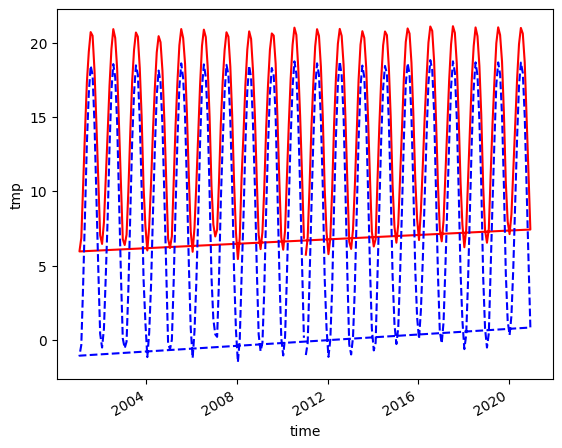

In [ ]:
#plotting weighted and unweighted air temperatures
w_mean.plot(label="weighted", color='red')
ta.mean(("lon", "lat")).plot(label="unweighted", color='blue', linestyle='--')

#fitting a linear regression for each series
ta.polyfit(dim=('time'), deg=0)


plt.legend()
plt.xlabel("Year")
plt.ylabel("Global Air Temperature")
plt.title("Annual Global Air Temperature (weighted vs. unweighted)")